In [14]:
import numpy as np
import matplotlib.pyplot as plt
import comphy
plt.rcParams['figure.figsize'] = (16, 9)


In [3]:
def newtraph(x0,f, tol,maxiter, fd):
    '''
        Parameters
        ----------
        x0 : float
            Initial guess
        f: function
            function whose roots need to be calculated
        tol : float
            error tolerance
        maxiter : int
                maximum number of iterations required.
        fd : function
            derivative type, can be analytical or numerical
        Returns
        ---------
        returns a root around 'x0' using the Newton-Raphson Method
    '''
    if abs(f(x0))<=tol:
        print("The root is ",x0)
    elif abs(fd(x0))<=tol:# flatness check
        print("The reciprocal of the derivative will blow up. Pls choose a different point")
    else:
        print("%1s %10s %10s %10s"%("n", "x_n-1","x_n","f(x_n)"))
        fx0 = f(x0)
        fdx0 = fd(x0)
        x1 = x0 - fx0/fdx0# new point calculation
        err = abs(f(x1))
        count = 0
        while err > tol:
            fx0 = f(x0)
            fdx0 = fd(x0)
            x1 = x0 - fx0/fdx0# new point calculation
            fx1 = f(x1)
            print("%2d %10.6f %10.6f %10.6f"%(count,x0,x1,fx1))

            x0 = x1
            fx1 = f(x1)
            err = abs(fx1)
            count +=1
            if count == maxiter:
                print("Did not converge")
                return None
    print("%2d %10.6f %10.6f %10.6f"%(count,x0,x1,fx1))
    print("The root is ", x1)
    return x1

In [18]:
def f(x):
    y = 2/(x**4) - 1/(x**2)
    return y
def fd(x):
    y = -8/(x**5) + 2/(x**3)
    return y

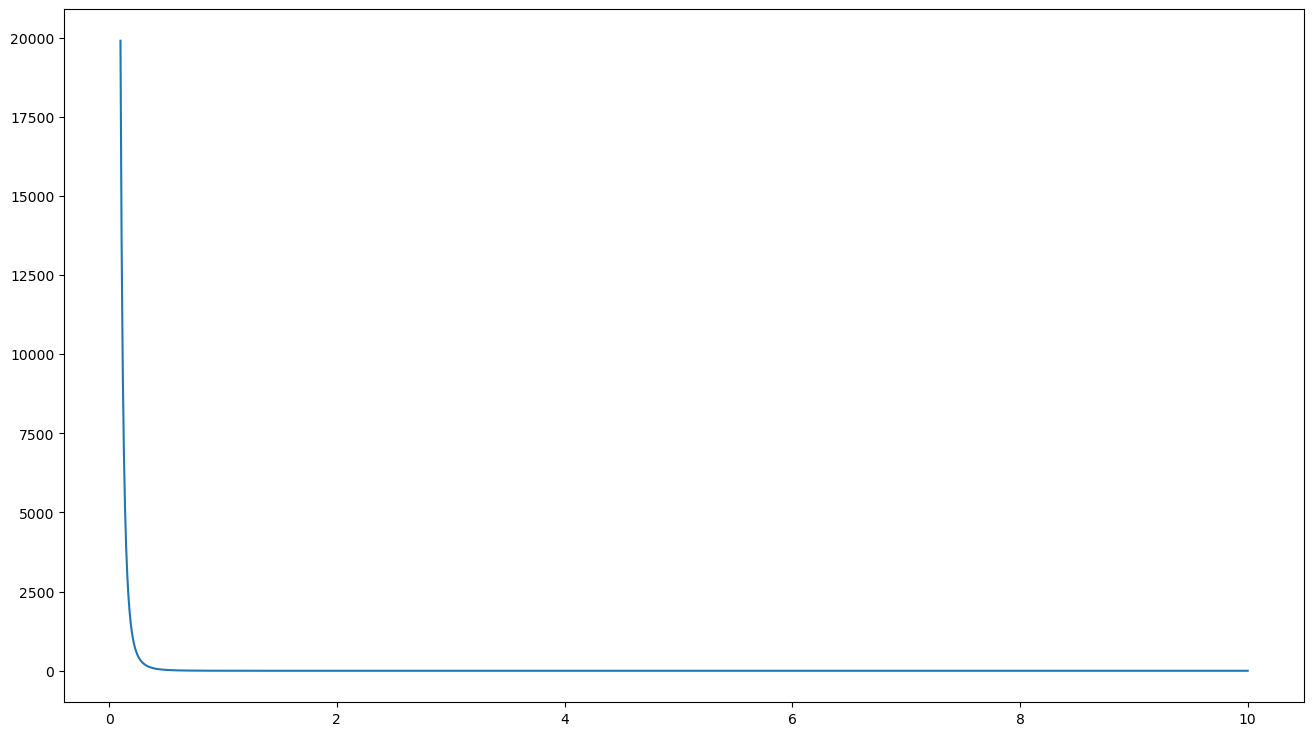

In [16]:
xval = np.linspace(0.1,10,1000)
yval = f(xval)
plt.plot(xval,yval)

In [17]:
f(np.sqrt(2))

np.float64(0.0)

In [19]:
tol = 1e-8
maxiter = 100
x0 = 1.0
root = newtraph(x0,f,tol,maxiter,fd)

n      x_n-1        x_n     f(x_n)
 0   1.000000   1.166667   0.344856
 1   1.166667   1.307895   0.098906
 2   1.307895   1.390562   0.017742
 3   1.390562   1.412883   0.000944
 4   1.412883   1.414209   0.000003
 5   1.414209   1.414214   0.000000
 6   1.414214   1.414214   0.000000
The root is  1.414213562325828


In [20]:
x0 = 2.5
root = newtraph(x0,f,tol,maxiter,fd)

n      x_n-1        x_n     f(x_n)
 0   2.500000   4.861111  -0.038737
 1   4.861111   7.539298  -0.016974
 2   7.539298  11.451627  -0.007509
 3  11.451627  17.267511  -0.003331
 4  17.267511  25.959966  -0.001479
 5  25.959966  38.978700  -0.000657
 6  38.978700  58.493773  -0.000292
 7  58.493773  87.757775  -0.000130
 8  87.757775 131.648064  -0.000058
 9 131.648064 197.479694  -0.000026
10 197.479694 296.224605  -0.000011
11 296.224605 444.340283  -0.000005
12 444.340283 666.512676  -0.000002
13 666.512676 999.770514  -0.000001
14 999.770514 1499.656771  -0.000000
15 1499.656771 2249.485823  -0.000000
16 2249.485823 3374.229180  -0.000000
17 3374.229180 5061.344066  -0.000000
18 5061.344066 7592.016296  -0.000000
19 7592.016296 11388.024576  -0.000000
20 11388.024576 11388.024576  -0.000000
The root is  11388.02457638685


In [209]:
def call(meth,a,b,N,y0,f): # call function Discretizes and generates method
    '''
    Parameters
    ----------
    meth : function
        the numerical method to be used
        'euler' for Euler method
        'midpoint' for Midpoint method
        'rk4' for Runge-Kutta 4 method
    a : float
        start time for differential equation solver
    b : float
        end time for differential equation solver
    N : int
        number of strips for discretization
    y0 : float
        initial value of differential equation solution
    f : function
        the function on the right hand side of the differential equation
    
    Returns
    ---------
    returns the value of y at each time step using the numerical method specified.
        
    '''
    h = (b-a)/(N-1)
    ys = np.zeros((N, len(y0)))
    y,ys[0] = y0,y0
    xs = np.arange(a,b+h/2,h)
    for i in range(N):
        ys[i,:] = y # to allow for vector solutions
        y = meth(y,xs[i],h,f)
    return ys


def rk4(y,x,h,f):
    '''
    Parameters
    ----------
    y : float
        initial value at (n-1) time step
    x : float
        initial value of independent variable
    h : float
        step size
    f : function
        the function on the right hand side of the differential equation using the Runge-Kutta 4 method
    
    Returns
    ---------
    returns the value of y at the next time step using the Runge-Kutta 4 method
    
    '''
    k1 = h*f(x,y)
    k2 = h*f(x+h/2,y+k1/2)
    k3 = h*f(x+h/2,y+k2/2)
    k4 = h*f(x+h,y+k3)
    y_n = y + (k1+2*k2+2*k3+k4)/6
    return y_n

In [210]:
def f1(t,y):
    y = np.asarray([y[1], -(w**2)*y[0] - L*(y[1]**5)])
    return y

In [211]:
y_ini = np.asarray([1.0,0.0])
w = 4*np.pi
L = 2

x0 = 0.0
xf = 2.0
h = 0.0001
N = 1+int((xf-x0)/h)


In [212]:
prk4 = call(rk4,x0,xf,N,y_ini, f=f1)
xs = np.arange(x0, xf+h/2, h)  # Generate range of x values
prk4[-1,0]

np.float64(0.00928169327281103)

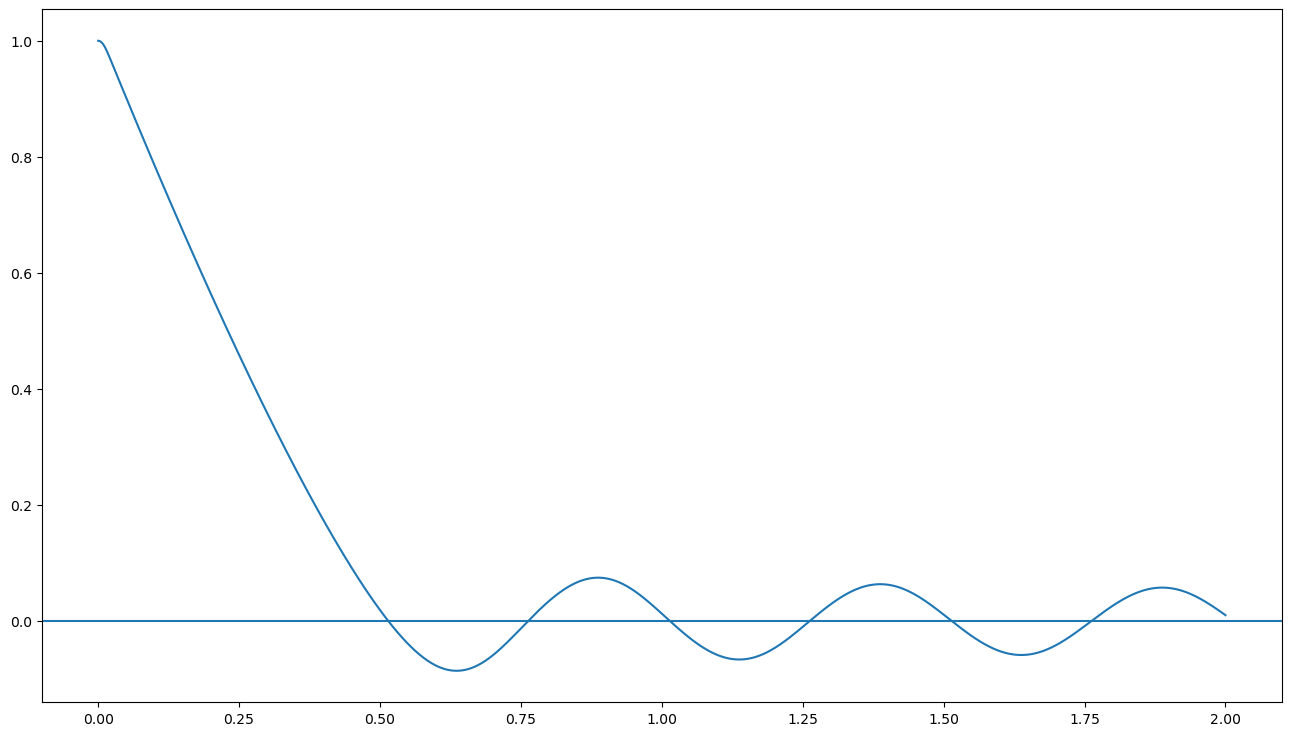

In [46]:
plt.plot(xs, prk4[:,0], label = "RK 4")
# plt.plot(xs, prk4[:,1], label = "RK 4")
plt.axhline(0)

In [47]:
def bisection(a,b,f,tol,maxiter):
    '''
        Parameters
        ----------
        a : float
            left guess
        b : float
            right guess
        f : function
            function whose roots need to be calculated
        tol : float
            error tolerance
        maxiter : int
                maximum number of iterations
        Returns
        ---------
        returns a root between 'a' and 'b' using the bisection method
    '''
    c = (a+b)/2
    err = abs(f(c))
    print("%1s %10s %10s %10s %10s"%("n", "a","b","c","f(c)"))
    count = 0
    if abs(f(a))<=tol:
        return a
    elif abs(f(b))<=tol:
        return b
    if f(a)*f(b)>0:
        print("Error")
        return None
    while err > tol:
        c = (a+b)/2 # taking a midpoint
        fa = f(a)
        fb = f(b)
        fc = f(c)
        print("%2d %10.6f %10.6f %10.6f %10.6f"%(count,a,b,c,fc))
        if fa*fc<0:# conditions
            b=c
        elif fc*fb<0:
            a=c
        elif abs(fc)<=tol:
            return c
        count+=1
        err = abs(fc)# error in numerical estimation
        if count ==maxiter:
            print("Did not converge")
            return None
    print("The root is ",c)
    return c

In [72]:
y_ini = np.asarray([1.0,0.0])
w = 4*np.pi
L = 2
def soln(t,y_i=y_ini,h=h):
    x0 = 0.0
    N = 1+int((t-x0)/h)
    posn = call(rk4,x0,t,N,y_ini, f=f1)[-1,0]    
    return posn

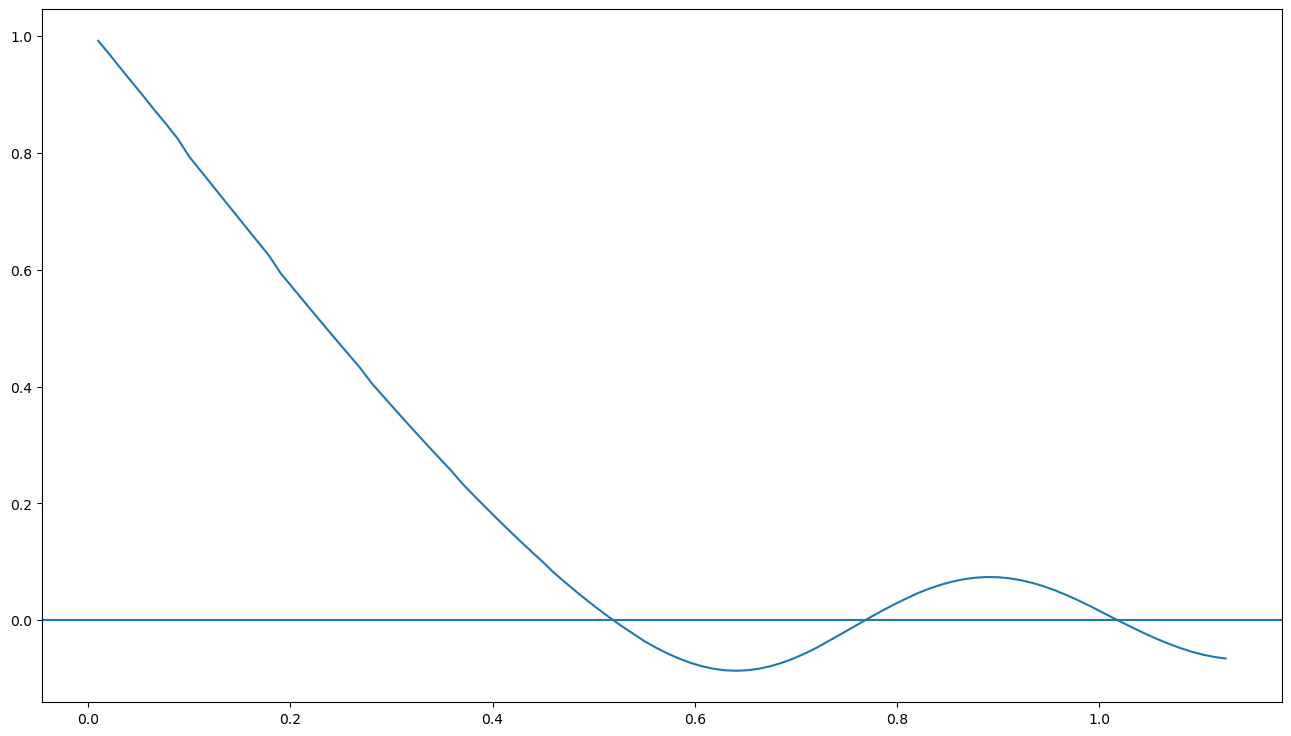

In [73]:
soln(2.0,y_ini,0.01)
tv = np.linspace(0.01,1.125,100)
posn = np.asarray([soln(i,y_ini,0.01) for i in tv])
plt.plot(tv,posn)
plt.axhline(0)

In [74]:
soln(0.5,y_ini,0.01)


np.float64(0.024508975304158964)

In [88]:
tol = 1e-7
maxiter = 100

a1 = 0.4
b1 = 0.6
rt1 = bisection(a1,b1,soln,tol,maxiter)

n          a          b          c       f(c)
 0   0.400000   0.600000   0.500000   0.018062
 1   0.500000   0.600000   0.550000  -0.040527
 2   0.500000   0.550000   0.525000  -0.013318
 3   0.500000   0.525000   0.512500   0.001906
 4   0.512500   0.525000   0.518750  -0.005829
 5   0.512500   0.518750   0.515625  -0.001991
 6   0.512500   0.515625   0.514062  -0.000050
 7   0.512500   0.514062   0.513281   0.000926
 8   0.513281   0.514062   0.513672   0.000437
 9   0.513672   0.514062   0.513867   0.000194
10   0.513867   0.514062   0.513965   0.000072
11   0.513965   0.514062   0.514014   0.000011
12   0.514014   0.514062   0.514038  -0.000020
13   0.514014   0.514038   0.514026  -0.000004
14   0.514014   0.514026   0.514020   0.000003
15   0.514020   0.514026   0.514023  -0.000001
16   0.514020   0.514023   0.514021   0.000001
17   0.514021   0.514023   0.514022   0.000000
18   0.514022   0.514023   0.514022  -0.000000
19   0.514022   0.514022   0.514022   0.000000
The root is  0

In [85]:
a2 = 0.6
b2 = 0.9
rt2 = bisection(a2,b2,soln,tol,maxiter)

n          a          b          c       f(c)
 0   0.600000   0.900000   0.750000  -0.013543
 1   0.750000   0.900000   0.825000   0.052663
 2   0.750000   0.825000   0.787500   0.022906
 3   0.750000   0.787500   0.768750   0.005134
 4   0.750000   0.768750   0.759375  -0.004146
 5   0.759375   0.768750   0.764063   0.000516
 6   0.759375   0.764063   0.761719  -0.001811
 7   0.761719   0.764063   0.762891  -0.000646
 8   0.762891   0.764063   0.763477  -0.000065
 9   0.763477   0.764063   0.763770   0.000226
10   0.763477   0.763770   0.763623   0.000080
11   0.763477   0.763623   0.763550   0.000008
12   0.763477   0.763550   0.763513  -0.000029
13   0.763513   0.763550   0.763531  -0.000010
14   0.763531   0.763550   0.763541  -0.000001
15   0.763541   0.763550   0.763545   0.000003
16   0.763541   0.763545   0.763543   0.000001
17   0.763541   0.763543   0.763542  -0.000000
18   0.763542   0.763543   0.763542   0.000000
19   0.763542   0.763542   0.763542   0.000000
20   0.763542 

In [86]:
a3 = 0.9
b3 = 1.2
rt3 = bisection(a3,b3,soln,tol,maxiter)

n          a          b          c       f(c)
 0   0.900000   1.200000   1.050000  -0.030515
 1   0.900000   1.050000   0.975000   0.033299
 2   0.975000   1.050000   1.012500   0.000801
 3   1.012500   1.050000   1.031250  -0.015430
 4   1.012500   1.031250   1.021875  -0.007408
 5   1.012500   1.021875   1.017188  -0.003321
 6   1.012500   1.017188   1.014844  -0.001263
 7   1.012500   1.014844   1.013672  -0.000232
 8   1.012500   1.013672   1.013086   0.000285
 9   1.013086   1.013672   1.013379   0.000027
10   1.013379   1.013672   1.013525  -0.000102
11   1.013379   1.013525   1.013452  -0.000038
12   1.013379   1.013452   1.013416  -0.000006
13   1.013379   1.013416   1.013397   0.000010
14   1.013397   1.013416   1.013406   0.000002
15   1.013406   1.013416   1.013411  -0.000002
16   1.013406   1.013411   1.013409   0.000000
17   1.013409   1.013411   1.013410  -0.000001
18   1.013409   1.013410   1.013409  -0.000000
19   1.013409   1.013409   1.013409   0.000000
20   1.013409 

In [89]:
print("The Three roots are  -->",rt1,rt2,rt3)

The Three roots are  --> 0.5140222549438476 0.7635419368743898 1.0134090900421144


In [91]:
def w(x):
    y = 1/(0.1 + (1 + x)**2) + 1/(0.1 + x**2) + 1/(0.1 + (1-x)**2)
    return y

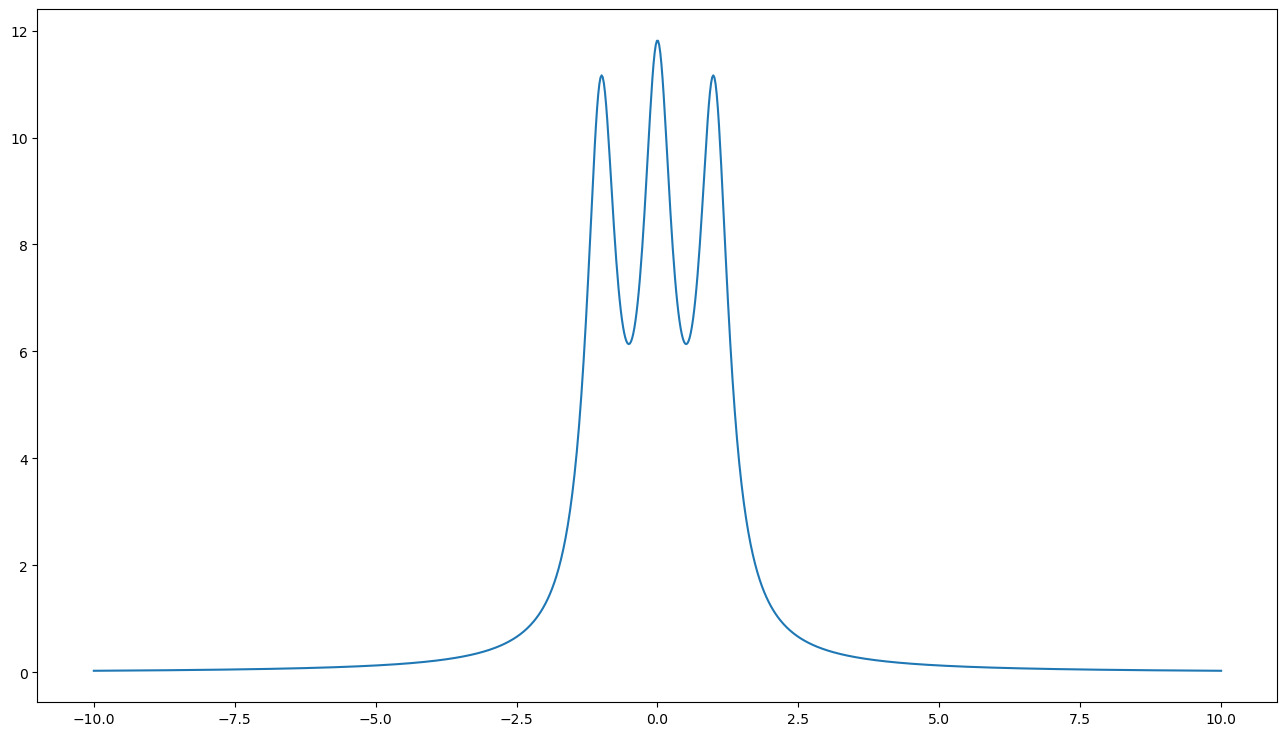

In [93]:
xw = np.linspace(-10,10,1000)
yw = w(xw)
plt.plot(xw,yw)

In [95]:
def metro(x, N, st,f=f):
    xar = np.zeros(N)
    rate = 0
    for i in range(N):
        xar[i] = x
        x1 = x + st*(2*np.random.rand()-1)
        r = min([1,f(x1)/f(x)])
        c = np.random.rand()
        if c<=r:
            x = x1
            rate +=1
    return xar, rate
                

In [192]:
# N = 1e6
N = int(1e6)
st = 3.2
xi = np.random.rand()-0.5
[samples, acc] = metro(xi,N,st,w)
accrate = acc/N
accrate

0.511748

In [193]:
Nsamples = 2000
N = 1000
accsamp = np.zeros(Nsamples)
for i in range(Nsamples):
    accsamp[i] = metro(xi,N,st,w)[-1]/N
mean_accsamp = np.mean(accsamp)
mean_accsamp

np.float64(0.506545)

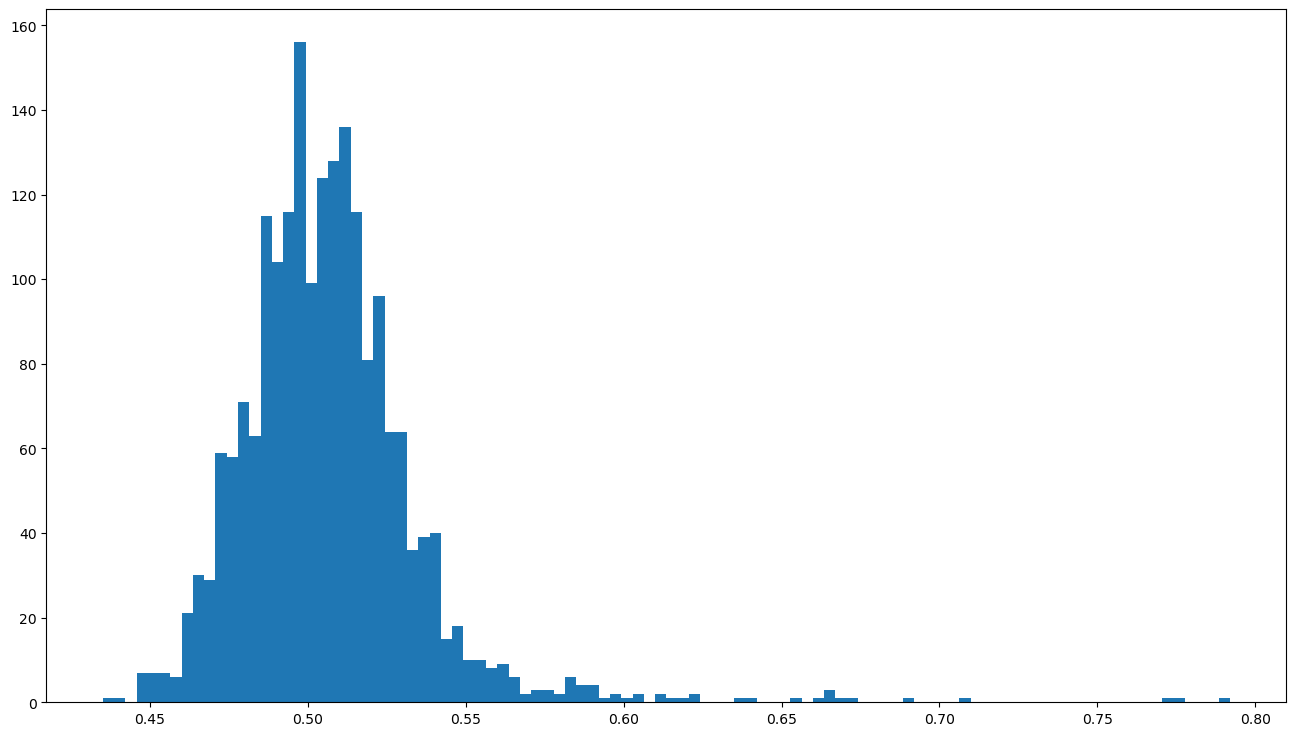

In [194]:
plt.hist(accsamp, bins =100);

(-10.0, 10.0)

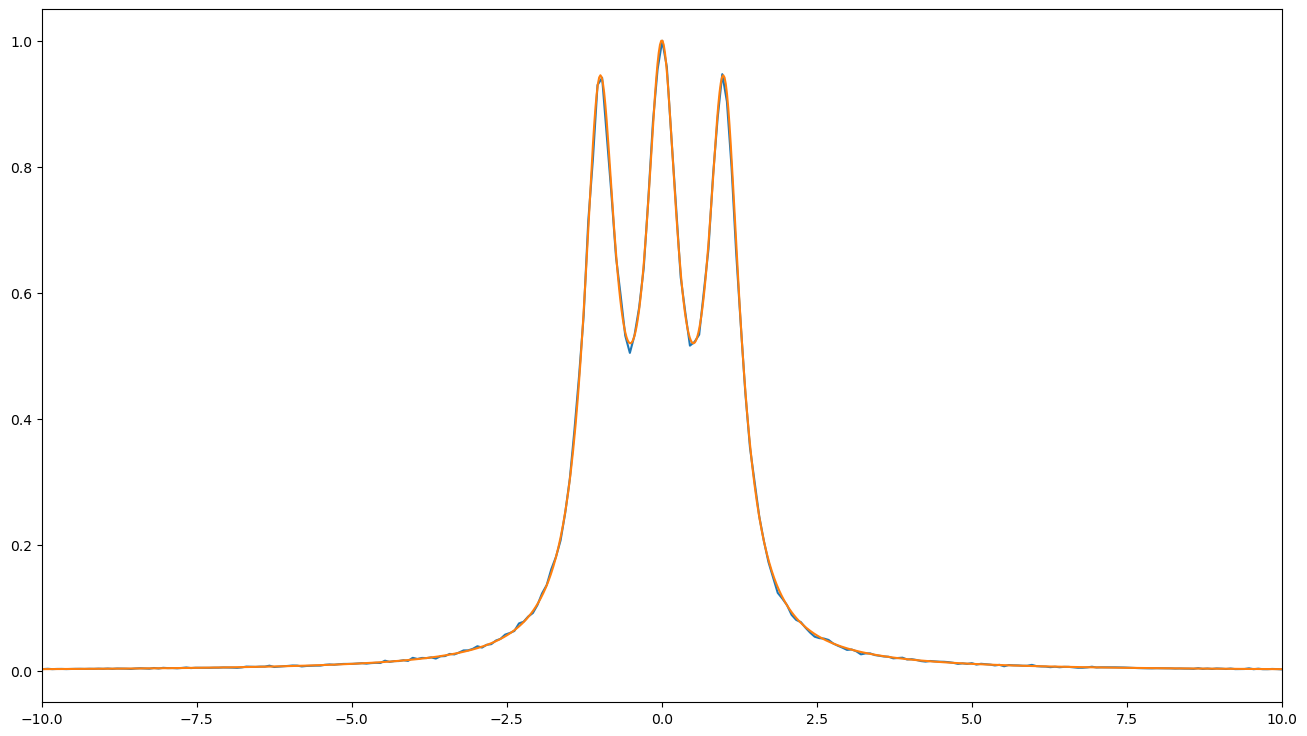

In [199]:
hist = np.histogram(samples,bins=5000)
val = hist[0]
bins = hist[1]
val = val/max(val)
mdt =  [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
plt.plot(mdt,val);
plt.plot(xw,yw/max(yw))
plt.xlim((-10,10))


In [174]:
hist

(array([     2,      6,      7,     11,     18,     22,     10,     16,
            15,     23,     14,     40,     30,     57,     43,     64,
            53,     78,     79,    107,    106,    123,    161,    167,
           226,    243,    309,    291,    425,    428,    520,    700,
           706,    891,   1042,   1423,   1736,   2712,   4389,   7418,
         16455,  89626, 366944, 368091,  91697,  17244,   7415,   4272,
          2832,   1935,   1440,   1074,    898,    670,    529,    415,
           354,    304,    239,    241,    198,    211,    159,    143,
           149,    117,    104,     78,     93,     68,     90,     71,
            69,     71,     65,     75,     73,     90,     77,     89,
            74,     74,     67,     57,     46,     38,     19,     24,
            19,     18,      9,     16,      6,      9,     13,      6,
            15,     11,      1,      2]),
 array([-5.40404229e+01, -5.27837819e+01, -5.15271409e+01, -5.02704999e+01,
        -4.9013858

Question 3:


$$y''= -y + 2y'^2/y $$
$$y' = z ; z' = -y + 2z^2/y$$

In [219]:
def f2(x,y):
    r = np.asarray([y[1], -y[0] + 2 * (y[1]**2)/y[0]])
    # print(r)
    return r

In [255]:
xlim = np.asarray([0.0,2.0])
h = 0.01
y_ini = np.asarray([0.4,-10])
N = 1+int((xlim[1]-xlim[0])/h)

yb = 0.2

z = np.linspace(-1,1,100)

def score(z,f, y_i = y_ini):
    y_i = np.asarray([y_ini[0], z])
    srk4 = call(rk4,0,2.0,N,y_i, f)
    sc = srk4[-1,0]
    return sc-yb
srk4[-1,0]

scores = [score(i,f2) for i in z]

aa = 0.1
bb = 0.3
score(0.3,f2)

/tmp/ipykernel_286732/302114884.py:2: RuntimeWarning: overflow encountered in scalar power
  r = np.asarray([y[1], -y[0] + 2 * (y[1]**2)/y[0]])
/tmp/ipykernel_286732/302114884.py:2: RuntimeWarning: invalid value encountered in scalar divide
  r = np.asarray([y[1], -y[0] + 2 * (y[1]**2)/y[0]])


np.float64(0.18385859887695988)

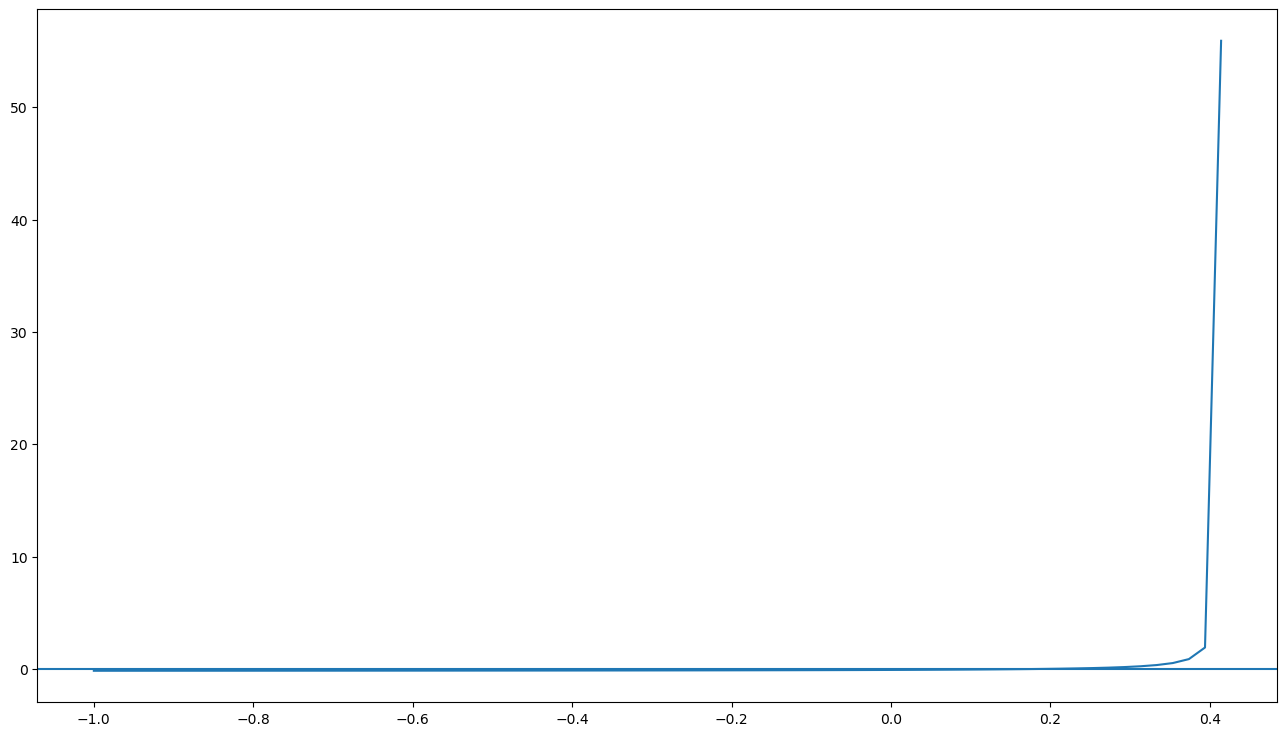

In [246]:
plt.axhline(0)
plt.plot(z, scores)

In [258]:
def bisection1(a,b,f,m,tol,maxiter):
    '''
        Parameters
        ----------
        a : float
            left guess
        b : float
            right guess
        f : function
            function whose roots need to be calculated
        tol : float
            error tolerance
        maxiter : int
                maximum number of iterations
        Returns
        ---------
        returns a root between 'a' and 'b' using the bisection method
    '''
    c = (a+b)/2
    err = abs(f(c,m))
    print("%1s %10s %10s %10s %10s"%("n", "a","b","c","f(c,m)"))
    count = 0
    if abs(f(a,m))<=tol:
        return a
    elif abs(f(b,m))<=tol:
        return b
    if f(a,m)*f(b,m)>0:
        print("Error")
        return None
    while err > tol:
        c = (a+b)/2 # taking a midpoint
        fa = f(a,m)
        fb = f(b,m)
        fc = f(c,m)
        print("%2d %10.6f %10.6f %10.6f %10.6f"%(count,a,b,c,fc))
        if fa*fc<0:# conditions
            b=c
        elif fc*fb<0:
            a=c
        elif abs(fc)<=tol:
            return c
        count+=1
        err = abs(fc)# error in numerical estimation
        if count ==maxiter:
            print("Did not converge")
            return None
    print("The root is ",c)
    return c

In [260]:
z0 = bisection1(aa,bb, score, f2, tol, maxiter)

n          a          b          c     f(c,m)
 0   0.100000   0.300000   0.200000   0.005258
 1   0.100000   0.200000   0.150000  -0.033481
 2   0.150000   0.200000   0.175000  -0.016130
 3   0.175000   0.200000   0.187500  -0.006023
 4   0.187500   0.200000   0.193750  -0.000542
 5   0.193750   0.200000   0.196875   0.002316
 6   0.193750   0.196875   0.195312   0.000877
 7   0.193750   0.195312   0.194531   0.000165
 8   0.193750   0.194531   0.194141  -0.000189
 9   0.194141   0.194531   0.194336  -0.000012
10   0.194336   0.194531   0.194434   0.000076
11   0.194336   0.194434   0.194385   0.000032
12   0.194336   0.194385   0.194360   0.000010
13   0.194336   0.194360   0.194348  -0.000001
14   0.194348   0.194360   0.194354   0.000004
15   0.194348   0.194354   0.194351   0.000002
16   0.194348   0.194351   0.194350   0.000000
17   0.194348   0.194350   0.194349  -0.000000
18   0.194349   0.194350   0.194349  -0.000000
19   0.194349   0.194350   0.194349   0.000000
The root is  0

In [265]:
xlim = np.asarray([0.0,2.0])
h = 0.01
y_1 = np.asarray([0.4,z0])
N = 1+int((xlim[1]-xlim[0])/h)
srk4 = call(rk4,0,2.0,N,y_1, f2)

xs = np.arange(x0, xf+h/2, h)  # Generate range of x values

ys = (1.55604*np.exp(xs))/(2.89009 + np.exp(2*xs))

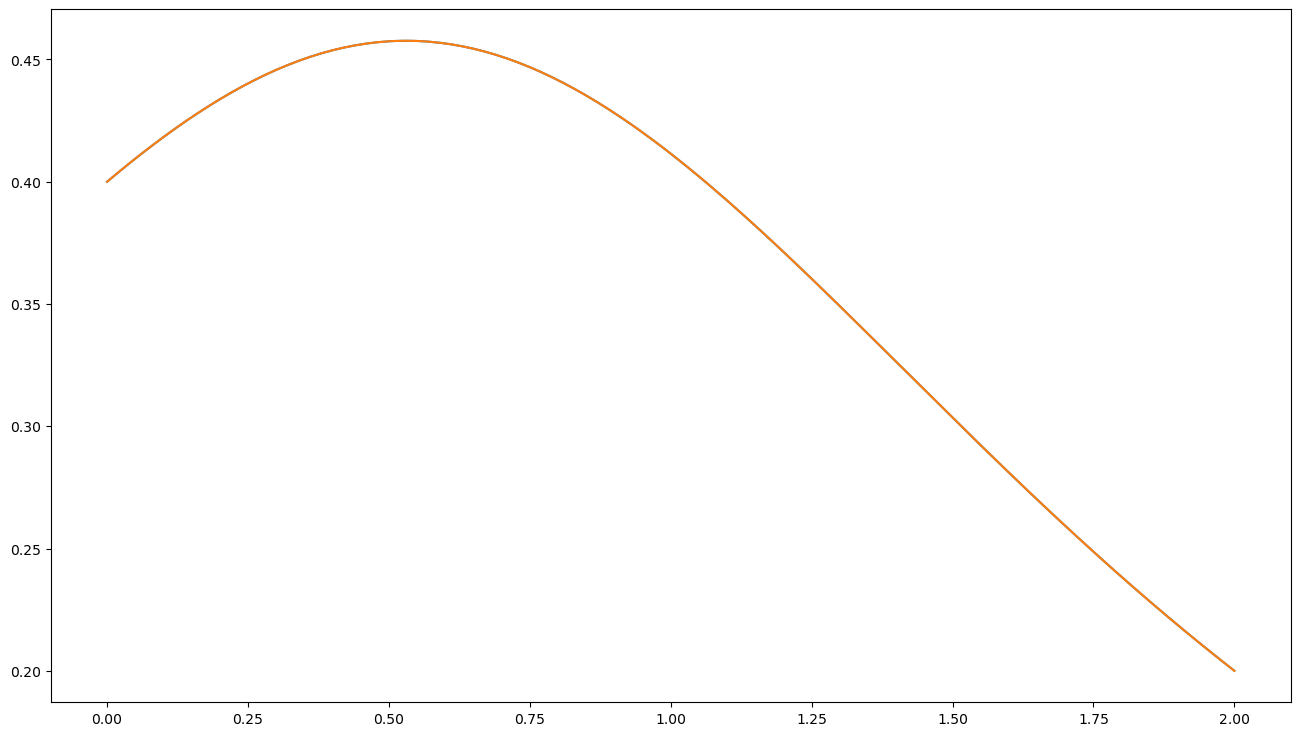

In [267]:
plt.plot(xs, srk4[:,0])
plt.plot(xs,ys)